In [1]:
from tqdm import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils2 import Ngram

In [2]:
obj_tbl = pd.read_csv("../../data/tables/Objects.csv.gz")
str_cols = "Title", "Description"
docs = [s for col in str_cols for s in obj_tbl[col].dropna()]

# docs = ["hello world", "hasta la vista", "goede avond", "hasta la proxima"]

In [3]:
NG = Ngram(ngram_range=(1,2), documents=docs)

ind_to_voc = {i: w for w, i in NG.vocab().items()}

(1, 2)-grams: Term Document Matrix constructed...
(1, 2)-grams: Init done


In [4]:
NG.term_doc_matrix.shape

(11199, 135935)

In [5]:
# def sent_prob(sent, n, ngram_model, log=True):
#     grams = list(ngram_model.iter_ngrams(sent, n, as_tuples=True))
    
#     if grams == []:
#         return None
    
#     gram_probs = {tuple(t): ngram_model.cond_prob(t[-1], *t[:-1]) for t in grams}
    
#     # start prob/seed prob
#     # crude approximation of P(w | <s>, ..., <s>) by P(w) (the latter upper bound the former)
#     gram_probs[tuple(grams[0][:-1])] = ngram_model.prob(*grams[0][:-1])
# #     first_gram_prob = ngram_model.prob(*grams[0][:-1])
    
#     return gram_probs


def sent_prob(sent, n, ngram_model, log=True):
    grams = list(ngram_model.iter_ngrams(sent, n, as_tuples=True))
    if grams == []:
        return None
    
    # start prob/seed prob
    # crude approximation of P(w | <s>, ..., <s>) by P(w) (the latter upper bound the former)
    first_p = ngram_model.prob(*grams[0][:-1])
    gram_probs = [ngram_model.cond_prob(t[-1], *t[:-1]) for t in grams] 
    return [first_p] + gram_probs

In [ ]:
for s in docs[:100]:
    print(list(NG.iter_ngrams(s, n=1)))
    print(sent_prob(s, 2, NG))
    print()

In [6]:
probs = [sent_prob(s, 2, NG) for s in tqdm(np.random.permutation(docs)[:1000])]

100%|██████████| 1000/1000 [03:29<00:00,  4.78it/s]


In [16]:
neg_log_probs = [-np.log2(s).sum() for s in probs if s]

(0, 1000)

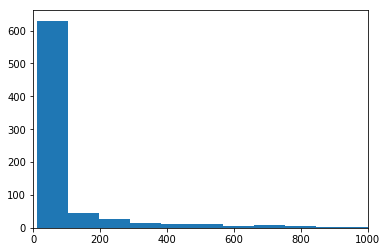

In [21]:
plt.hist(neg_log_probs, bins=100)
plt.xlim((0, 1000))


In [ ]:
def sent_prob(sent_ind, ng, log=True):
    _, inds = (ng.term_doc_matrix[sent_ind] > 0).nonzero()

    reduce_f = np.sum if log else np.prod
    
    return reduce_f([ng.prob(ind_to_voc[word_ind], log=log) for word_ind in inds])

In [ ]:
sorted_probs = sorted([ng.prob(w) for w in ng.vocab(1)])
sorted_cum = np.cumsum(sorted_probs)

print(sorted_probs)
print(sorted_cum)

plt.plot(range(len(ng.vocab(1))), sorted_cum)

In [ ]:
ng.cond_prob("la", "vista")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
dir(CountVectorizer)

In [ ]:
CountVectorizer.build_analyzer(cv)("hello world whats up ?")

In [ ]:
cv = CountVectorizer(ngram_range=(1,3))

In [ ]:
cv.fit_transform(docs)

In [ ]:
cv.token_pattern

In [ ]:
import re
for d in docs:
    print(re.split(cv.token_pattern, d))
    print(re.findall(cv.token_pattern, d))